In [3]:
import pandas as pd

df = pd.read_csv('phishing_email.csv')
print(df.head())

                                       text_combined  label
0  hpl nom may 25 2001 see attached file hplno 52...      0
1  nom actual vols 24 th forwarded sabrae zajac h...      0
2  enron actuals march 30 april 1 201 estimated a...      0
3  hpl nom may 30 2001 see attached file hplno 53...      0
4  hpl nom june 1 2001 see attached file hplno 60...      0


In [4]:
print(df.isnull().sum())

text_combined    0
label            0
dtype: int64


In [5]:
print(df['label'].value_counts())

1    42891
0    39595
Name: label, dtype: int64


In [6]:
df['text_combined'] = df['text_combined'].str.lower().str.strip()

In [7]:
from sklearn.model_selection import train_test_split

X = df['text_combined']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


🔹 Model: SVM
Accuracy: 0.9913
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7935
           1       0.99      0.99      0.99      8563

    accuracy                           0.99     16498
   macro avg       0.99      0.99      0.99     16498
weighted avg       0.99      0.99      0.99     16498



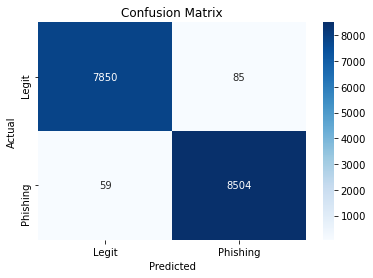

In [9]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

models = {
    "SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Phishing'], yticklabels=['Legit', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [10]:
import joblib

joblib.dump(model, 'phishing_email_2_detector.pkl')
joblib.dump(vectorizer, 'phishing_email_2_vectorizer.pkl')

['phishing_email_2_vectorizer.pkl']

In [11]:
import pickle

# Save model
with open('phishing_2_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save vectorizer
with open('2_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)